In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sc
import matplotlib.pyplot as pl
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/JordanVani/Documents/NYU/ADS/Report/Vision_Zero/Merged_V2.csv')
data.drop('Unnamed: 0', 1, inplace=True)
data = data.query('Year not in [2016, 2011, 2012]')
print data.shape
data.columns

(231, 55)


Index([u'PrecinctYear', u'Precinct', u'Year', u'Taxis', u'Flyers', u'Seniors',
       u'Outreach', u'HandsOn', u'Edu_Total', u'Backing Unsafely',
       u'Brake Lights (Defect.or Improper)', u'Bus Lane, Driving in',
       u'Cell Phone', u'Commercial Veh on Pkwy', u'Defective Brakes',
       u'Disobey Steady Red Signal', u'Disobey Traffic Control Device',
       u'Equipment (Other)', u'Fail to Keep Right', u'Fail to Signal',
       u'Following Too Closely', u'Headlights (Defect. or Improper)',
       u'Improper Lights', u'Improper Passing', u'Improper Turn',
       u'Improper/Missing Plates', u'Not Giving R of W to Pedes.',
       u'Not Giving R of W to Veh.', u'One Way Street', u'Other Movers',
       u'Pavement Markings', u'Safety Belt', u'School Bus, Passing Stopped',
       u'Speeding', u'Spillback', u'Tinted Windows', u'Truck Routes',
       u'U-Turn', u'Uninspected', u'Uninsured', u'Unlicensed Operator',
       u'Unregistered', u'P12', u'P123', u'Traf_Total',
       u'Neigh_Slow_

### Has There Been a Decrease in Injuries or Deaths Post Vision Zero?

In [4]:
preVZ = data.query('Year == 2013')
postVZ = data.query('Year in [2014, 2015]')

personsinjured = sc.ttest_ind(preVZ['NUMBER OF PERSONS INJURED'], postVZ['NUMBER OF PERSONS INJURED'])
personskilled = sc.ttest_ind(preVZ['NUMBER OF PERSONS KILLED'], postVZ['NUMBER OF PERSONS KILLED'])
pedinjured = sc.ttest_ind(preVZ['NUMBER OF PEDESTRIANS INJURED'], postVZ['NUMBER OF PEDESTRIANS INJURED'])
pedkilled = sc.ttest_ind(preVZ['NUMBER OF PEDESTRIANS KILLED'], postVZ['NUMBER OF PEDESTRIANS KILLED'])
cycinjured = sc.ttest_ind(preVZ['NUMBER OF CYCLIST INJURED'], postVZ['NUMBER OF CYCLIST INJURED'])
cyckilled = sc.ttest_ind(preVZ['NUMBER OF CYCLIST KILLED'], postVZ['NUMBER OF CYCLIST KILLED'])
motoinjured = sc.ttest_ind(preVZ['NUMBER OF MOTORIST INJURED'], postVZ['NUMBER OF MOTORIST INJURED'])
motokilled = sc.ttest_ind(preVZ['NUMBER OF MOTORIST KILLED'], postVZ['NUMBER OF MOTORIST KILLED'])


print "NUMBER OF PERSONS INJURED: ", personsinjured
print "NUMBER OF PERSONS KILLED: ", personskilled
print "NUMBER OF PEDESTRIANS INJURED: ", pedinjured
print "NUMBER OF PEDESTRIANS KILLED: ", pedkilled
print "NUMBER OF CYCLIST INJURED: ", cycinjured
print "NUMBER OF CYCLIST KILLED: ", cyckilled
print "NUMBER OF MOTORIST INJURED: ", motoinjured
print "NUMBER OF MOTORIST KILLED: ", motokilled

NUMBER OF PERSONS INJURED:  Ttest_indResult(statistic=1.102857169053532, pvalue=0.27124684145722694)
NUMBER OF PERSONS KILLED:  Ttest_indResult(statistic=1.2321455695227292, pvalue=0.21915832688152653)
NUMBER OF PEDESTRIANS INJURED:  Ttest_indResult(statistic=2.0418680765817521, pvalue=0.042310774522712702)
NUMBER OF PEDESTRIANS KILLED:  Ttest_indResult(statistic=1.521719217215088, pvalue=0.1294590608339313)
NUMBER OF CYCLIST INJURED:  Ttest_indResult(statistic=-0.15725487720103093, pvalue=0.87518254289725106)
NUMBER OF CYCLIST KILLED:  Ttest_indResult(statistic=-1.6309212059987916, pvalue=0.1042814663020092)
NUMBER OF MOTORIST INJURED:  Ttest_indResult(statistic=0.82768772056458795, pvalue=0.40870907671646139)
NUMBER OF MOTORIST KILLED:  Ttest_indResult(statistic=0.98195600341063205, pvalue=0.32715781104872366)


In [11]:
preVZ.describe()

,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Edu_Total,Backing Unsafely,...,Neigh_Slow_Zone_Total,Speed_Bump_Total,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,7.700000e+01,77.000000,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,6.352598e+05,63.324675,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,18.805195,...,0.077922,0.454545,608.831169,3.142857,140.350649,1.831169,48.363636,0.103896,420.116883,1.207792
std,3.611839e+05,36.118388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.175061,...,0.314820,1.094790,307.771720,2.644330,66.610961,1.673340,33.590768,0.307127,261.144443,1.558826
min,1.201300e+04,1.000000,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.000000,82.000000,0.000000,22.000000,0.000000,2.000000,0.000000,40.000000,0.000000
25%,3.220130e+05,32.000000,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,...,0.000000,0.000000,405.000000,1.000000,94.000000,1.000000,23.000000,0.000000,227.000000,0.000000
50%,6.620130e+05,66.000000,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,...,0.000000,0.000000,588.000000,2.000000,132.000000,1.000000,38.000000,0.000000,394.000000,1.000000
75%,1.002013e+06,100.000000,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,23.000000,...,0.000000,0.000000,751.000000,4.000000,182.000000,3.000000,71.000000,0.000000,515.000000,1.000000
max,1.232013e+06,123.000000,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,68.000000,...,2.000000,5.000000,1703.000000,12.000000,304.000000,6.000000,168.000000,1.000000,1487.000000,6.000000


In [12]:
postVZ.describe()

,PrecinctYear,Precinct,Year,Taxis,Flyers,Seniors,Outreach,HandsOn,Edu_Total,Backing Unsafely,...,Neigh_Slow_Zone_Total,Speed_Bump_Total,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,6.352613e+05,63.324675,2014.500000,1.954545,0.616883,1.467532,8.337662,1.064935,13.441558,19.461039,...,0.038961,1.785714,561.305195,2.701299,122.779221,1.487013,49.077922,0.201299,389.448052,1.012987
std,3.600016e+05,36.000160,0.501631,3.969394,1.401204,2.036172,5.879199,1.467181,8.105503,17.694626,...,0.225299,4.267163,309.239597,2.528607,59.041167,1.593438,32.010932,0.476642,267.606262,1.347896
min,1.201400e+04,1.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
25%,3.220142e+05,32.000000,2014.000000,0.000000,0.000000,0.000000,4.000000,0.000000,8.000000,7.250000,...,0.000000,0.000000,345.500000,1.000000,80.500000,0.000000,25.000000,0.000000,193.000000,0.000000
50%,6.620145e+05,66.000000,2014.500000,0.000000,0.000000,1.000000,7.000000,1.000000,13.000000,14.000000,...,0.000000,0.000000,539.500000,2.000000,116.000000,1.000000,39.000000,0.000000,353.500000,1.000000
75%,1.002015e+06,100.000000,2015.000000,3.000000,0.000000,2.000000,12.000000,2.000000,18.000000,24.000000,...,0.000000,0.000000,694.750000,4.000000,163.500000,2.000000,72.000000,0.000000,490.500000,1.000000
max,1.232015e+06,123.000000,2015.000000,38.000000,7.000000,13.000000,25.000000,9.000000,59.000000,93.000000,...,2.000000,30.000000,1820.000000,12.000000,267.000000,8.000000,162.000000,2.000000,1628.000000,6.000000


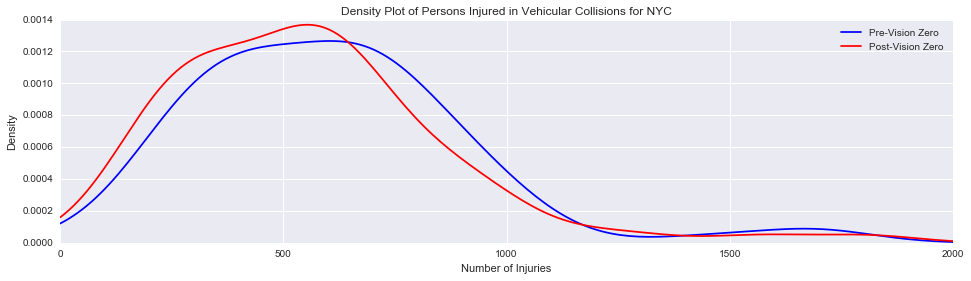

In [5]:
density = sc.gaussian_kde(preVZ['NUMBER OF PERSONS INJURED'])
density1 = sc.gaussian_kde(postVZ['NUMBER OF PERSONS INJURED'])
xs = np.linspace(0, 2000, 200)


fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.plot(xs, density(xs), c='b', label='Pre-Vision Zero')
ax1.plot(xs, density1(xs), c='r', label='Post-Vision Zero')
ax1.set_title('Density Plot of Persons Injured in Vehicular Collisions for NYC')
ax1.set_ylabel('Density')
ax1.set_xlabel('Number of Injuries')
ax1.legend()

In [6]:
ks = sc.stats.ks_2samp(postVZ['NUMBER OF PERSONS INJURED'], 
                       preVZ['NUMBER OF PERSONS INJURED'])
print (ks)

Ks_2sampResult(statistic=0.12337662337662347, pvalue=0.39182090769492822)


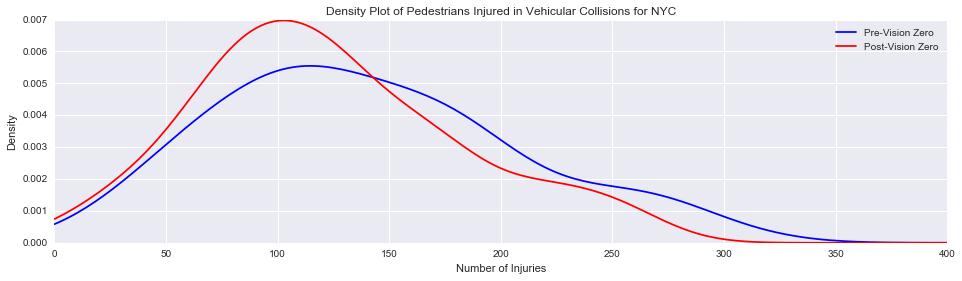

In [7]:
density = sc.gaussian_kde(preVZ['NUMBER OF PEDESTRIANS INJURED'])
density1 = sc.gaussian_kde(postVZ['NUMBER OF PEDESTRIANS INJURED'])
xs = np.linspace(0, 400, 200)

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.plot(xs, density(xs), c='b', label='Pre-Vision Zero')
ax1.plot(xs, density1(xs), c='r', label='Post-Vision Zero')
ax1.set_title('Density Plot of Pedestrians Injured in Vehicular Collisions for NYC')
ax1.set_ylabel('Density')
ax1.set_xlabel('Number of Injuries')
ax1.legend()

In [8]:
ks = sc.stats.ks_2samp(postVZ['NUMBER OF PEDESTRIANS INJURED'], 
                       preVZ['NUMBER OF PEDESTRIANS INJURED'])
print (ks)

Ks_2sampResult(statistic=0.14935064935064934, pvalue=0.18543743077400293)


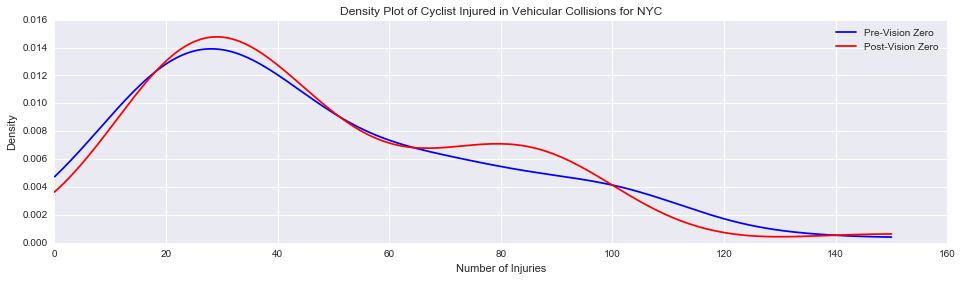

In [9]:
density = sc.gaussian_kde(preVZ['NUMBER OF CYCLIST INJURED'])
density1 = sc.gaussian_kde(postVZ['NUMBER OF CYCLIST INJURED'])
xs = np.linspace(0, 150, 200)

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.plot(xs, density(xs), c='b', label='Pre-Vision Zero')
ax1.plot(xs, density1(xs), c='r', label='Post-Vision Zero')
ax1.set_title('Density Plot of Cyclist Injured in Vehicular Collisions for NYC')
ax1.set_ylabel('Density')
ax1.set_xlabel('Number of Injuries')
ax1.legend()

In [13]:
ks = sc.stats.ks_2samp(postVZ['NUMBER OF CYCLIST INJURED'], 
                       preVZ['NUMBER OF CYCLIST INJURED'])
print (ks)

Ks_2sampResult(statistic=0.064935064935064957, pvalue=0.97817885637034685)


### Does Changing Ticketing Priorities Correlate with a Change in Injuries?

In [96]:
cols = ['Precinct', 'Not Giving R of W to Pedes.', 'P12', 'P123',
        'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
        'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
        'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
        'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

data2013 = data.query('Year == 2013')
data2013 = data2013[cols]
data2014 = data.query('Year == 2014')
data2014 = data2014[cols]
data2015 = data.query('Year == 2015')
data2015 = data2015[cols]

mergeinit = pd.merge(data2013, data2014, on='Precinct')
merge = pd.merge(mergeinit, data2015, on='Precinct')
merge['ChangeP1_2014'] = (merge['Not Giving R of W to Pedes._y'] - merge['Not Giving R of W to Pedes._x']) / merge['Not Giving R of W to Pedes._x']
merge['ChangeInj_2014'] = (merge['NUMBER OF PERSONS INJURED_y'] - merge['NUMBER OF PERSONS INJURED_x']) / merge['NUMBER OF PERSONS INJURED_x']
merge['ChangeP1_2015'] = (merge['Not Giving R of W to Pedes.'] - merge['Not Giving R of W to Pedes._x']) / merge['Not Giving R of W to Pedes._x']
merge['ChangeInj_2015'] = (merge['NUMBER OF PERSONS INJURED'] - merge['NUMBER OF PERSONS INJURED_x']) / merge['NUMBER OF PERSONS INJURED_x']

merge['ChangeP12_2014'] = (merge['P12_y'] - merge['P12_x']) / merge['P12_x']
merge['ChangeP12_2015'] = (merge['P12'] - merge['P12_x']) / merge['P12_x']

merge['ChangeP123_2014'] = (merge['P123_y'] - merge['P123_x']) / merge['P123_x']
merge['ChangeP123_2015'] = (merge['P123'] - merge['P123_x']) / merge['P123_x']

merge['ChangePedInj_2014'] = (merge['NUMBER OF PEDESTRIANS INJURED_y'] - merge['NUMBER OF PEDESTRIANS INJURED_x']) / merge['NUMBER OF PEDESTRIANS INJURED_x']
merge['ChangePedInj_2015'] = (merge['NUMBER OF PEDESTRIANS INJURED'] - merge['NUMBER OF PEDESTRIANS INJURED_x']) / merge['NUMBER OF PEDESTRIANS INJURED_x']

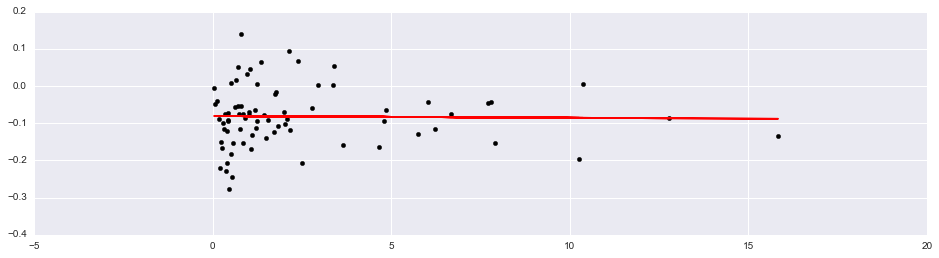

In [97]:
mergeP1 = merge.query('ChangeInj_2014 > -0.5')
results = smf.ols('ChangeInj_2014 ~ ChangeP1_2014', data = mergeP1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(mergeP1['ChangeP1_2014'], mergeP1['ChangeInj_2014'], c='k')
ax1.plot(mergeP1['ChangeP1_2014'], results.predict(), c='r')

In [77]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ChangeInj_2014   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.02508
Date:                Thu, 01 Dec 2016   Prob (F-statistic):              0.875
Time:                        16:36:20   Log-Likelihood:                 83.946
No. Observations:                  76   AIC:                            -163.9
Df Residuals:                      74   BIC:                            -159.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.0806      0.012     -6.817      0.000        -0.104    -0.057
ChangeP1_2014    -0.0005      0.003     -0.158      0.875        -0.007     0.006
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.520
Skew:                           0.191   Prob(JB):                        0.771
Kurtosis:                       3.135   Cond. No.                         5.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

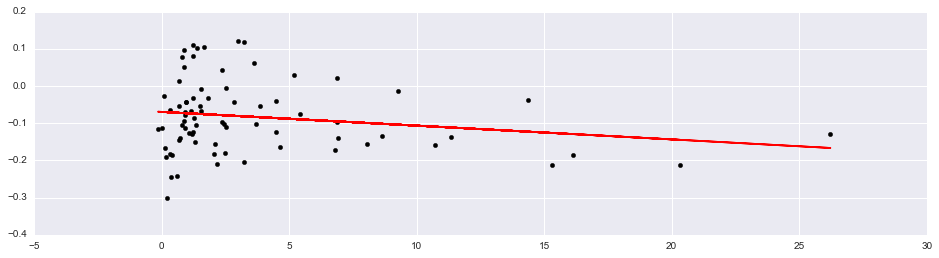

In [78]:
results1 = smf.ols('ChangeInj_2015 ~ ChangeP1_2015', data = mergeP1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(mergeP1['ChangeP1_2015'], mergeP1['ChangeInj_2015'], c='k')
ax1.plot(mergeP1['ChangeP1_2015'], results1.predict(), c='r')

In [79]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ChangeInj_2015   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.661
Date:                Thu, 01 Dec 2016   Prob (F-statistic):              0.107
Time:                        16:36:23   Log-Likelihood:                 71.771
No. Observations:                  76   AIC:                            -139.5
Df Residuals:                      74   BIC:                            -134.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.0696      0.014     -5.107      0.000        -0.097    -0.042
ChangeP1_2015    -0.0037      0.002     -1.631      0.107        -0.008     0.001
==============================================================================
Omnibus:                        1.549   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.567
Skew:                           0.321   Prob(JB):                        0.457
Kurtosis:                       2.714   Cond. No.                         7.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

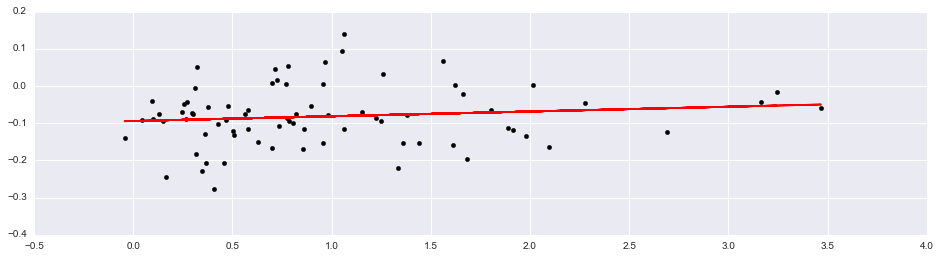

In [90]:
results2 = smf.ols('ChangeInj_2014 ~ ChangeP12_2014', data = mergeP1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(mergeP1['ChangeP12_2014'], mergeP1['ChangeInj_2014'], c='k')
ax1.plot(mergeP1['ChangeP12_2014'], results2.predict(), c='r')

In [91]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ChangeInj_2014   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.103
Date:                Thu, 01 Dec 2016   Prob (F-statistic):              0.297
Time:                        16:39:17   Log-Likelihood:                 84.495
No. Observations:                  76   AIC:                            -165.0
Df Residuals:                      74   BIC:                            -160.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.0941      0.015     -6.292      0.000        -0.124    -0.064
ChangeP12_2014     0.0128      0.012      1.050      0.297        -0.011     0.037
==============================================================================
Omnibus:                        1.046   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.712
Skew:                           0.234   Prob(JB):                        0.700
Kurtosis:                       3.075   Cond. No.                         2.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

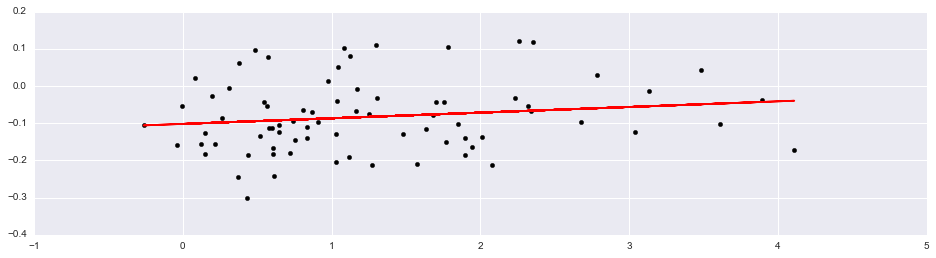

In [92]:
results3 = smf.ols('ChangeInj_2015 ~ ChangeP12_2015', data = mergeP1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(mergeP1['ChangeP12_2015'], mergeP1['ChangeInj_2015'], c='k')
ax1.plot(mergeP1['ChangeP12_2015'], results3.predict(), c='r')

In [93]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ChangeInj_2014   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.103
Date:                Thu, 01 Dec 2016   Prob (F-statistic):              0.297
Time:                        16:39:34   Log-Likelihood:                 84.495
No. Observations:                  76   AIC:                            -165.0
Df Residuals:                      74   BIC:                            -160.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.0941      0.015     -6.292      0.000        -0.124    -0.064
ChangeP12_2014     0.0128      0.012      1.050      0.297        -0.011     0.037
==============================================================================
Omnibus:                        1.046   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.712
Skew:                           0.234   Prob(JB):                        0.700
Kurtosis:                       3.075   Cond. No.                         2.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What About Pedestrian Injuries?

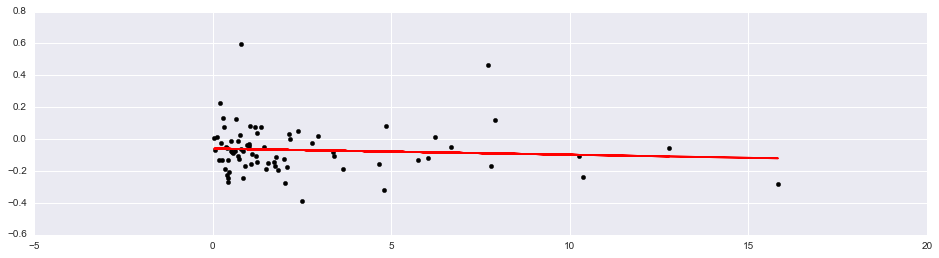

In [98]:
results = smf.ols('ChangePedInj_2014 ~ ChangeP1_2014', data = mergeP1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(mergeP1['ChangeP1_2014'], mergeP1['ChangePedInj_2014'], c='k')
ax1.plot(mergeP1['ChangeP1_2014'], results.predict(), c='r')

In [99]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ChangePedInj_2014   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4657
Date:                Thu, 01 Dec 2016   Prob (F-statistic):              0.497
Time:                        16:47:22   Log-Likelihood:                 36.299
No. Observations:                  76   AIC:                            -68.60
Df Residuals:                      74   BIC:                            -63.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.0590      0.022     -2.666      0.009        -0.103    -0.015
ChangeP1_2014    -0.0039      0.006     -0.682      0.497        -0.015     0.007
==============================================================================
Omnibus:                       39.124   Durbin-Watson:                   2.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.594
Skew:                           1.613   Prob(JB):                     6.51e-27
Kurtosis:                       8.260   Cond. No.                         5.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

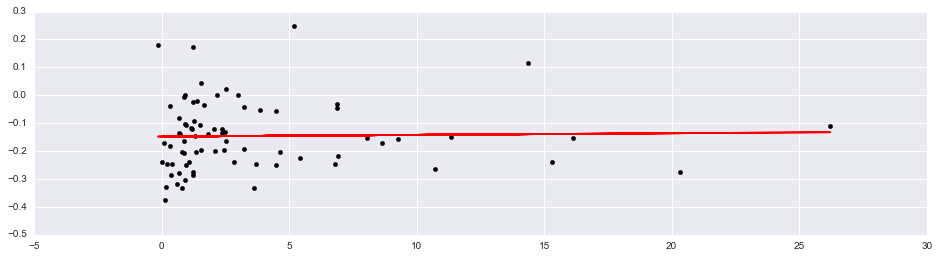

In [100]:
results1 = smf.ols('ChangePedInj_2015 ~ ChangeP1_2015', data = mergeP1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(mergeP1['ChangeP1_2015'], mergeP1['ChangePedInj_2015'], c='k')
ax1.plot(mergeP1['ChangeP1_2015'], results1.predict(), c='r')

In [101]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ChangePedInj_2015   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.03912
Date:                Thu, 01 Dec 2016   Prob (F-statistic):              0.844
Time:                        16:48:50   Log-Likelihood:                 51.392
No. Observations:                  76   AIC:                            -98.78
Df Residuals:                      74   BIC:                            -94.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.1477      0.018     -8.290      0.000        -0.183    -0.112
ChangeP1_2015     0.0006      0.003      0.198      0.844        -0.005     0.006
==============================================================================
Omnibus:                       10.752   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.794
Skew:                           0.828   Prob(JB):                      0.00453
Kurtosis:                       3.816   Cond. No.                         7.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

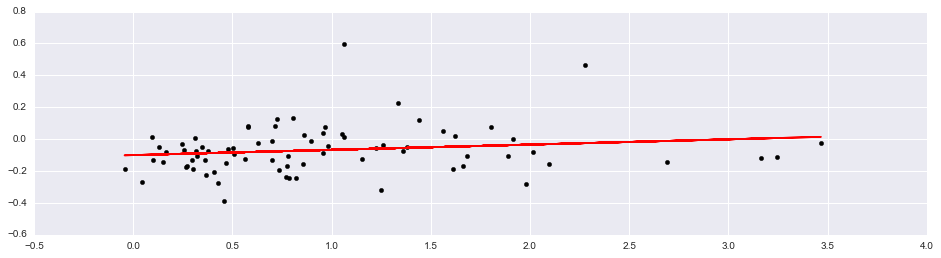

In [102]:
results2 = smf.ols('ChangePedInj_2014 ~ ChangeP12_2014', data = mergeP1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(mergeP1['ChangeP12_2014'], mergeP1['ChangePedInj_2014'], c='k')
ax1.plot(mergeP1['ChangeP12_2014'], results2.predict(), c='r')

In [103]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ChangePedInj_2014   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.110
Date:                Thu, 01 Dec 2016   Prob (F-statistic):              0.151
Time:                        16:50:14   Log-Likelihood:                 37.129
No. Observations:                  76   AIC:                            -70.26
Df Residuals:                      74   BIC:                            -65.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.1001      0.028     -3.590      0.001        -0.156    -0.045
ChangeP12_2014     0.0330      0.023      1.453      0.151        -0.012     0.078
==============================================================================
Omnibus:                       35.041   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.230
Skew:                           1.462   Prob(JB):                     4.67e-22
Kurtosis:                       7.741   Cond. No.                         2.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

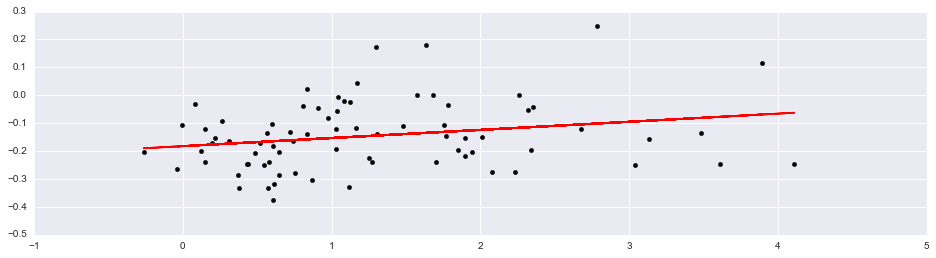

In [104]:
results3 = smf.ols('ChangePedInj_2015 ~ ChangeP12_2015', data = mergeP1).fit()

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(mergeP1['ChangeP12_2015'], mergeP1['ChangePedInj_2015'], c='k')
ax1.plot(mergeP1['ChangeP12_2015'], results3.predict(), c='r')

In [105]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ChangePedInj_2015   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4.123
Date:                Thu, 01 Dec 2016   Prob (F-statistic):             0.0459
Time:                        16:51:37   Log-Likelihood:                 53.432
No. Observations:                  76   AIC:                            -102.9
Df Residuals:                      74   BIC:                            -98.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.1822      0.023     -8.003      0.000        -0.228    -0.137
ChangeP12_2015     0.0291      0.014      2.031      0.046         0.001     0.058
==============================================================================
Omnibus:                        6.263   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.624
Skew:                           0.645   Prob(JB):                       0.0601
Kurtosis:                       3.338   Cond. No.                         3.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""